In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
from RediCell_cupy import *
from DesignTool import *

Sides are [131  57  57] with spacing of 1.6e-08 m (3 dimensions).
Overall system sizes are [2.096e-06 9.120e-07 9.120e-07] m
Voxel [65 28 28] has a coordinate of [0. 0. 0.]
Voxel [102, 28, 28] has a coordinate of [5.92e-07 0.00e+00 0.00e+00]
Voxel [28, 28, 28] has a coordinate of [-5.92e-07  0.00e+00  0.00e+00]
Determined factor for a separating boundary as 0.7
Determined factor for a separating boundary as 0.7
Determined factor for a separating boundary as 0.7
Successfully created a E. coli rod


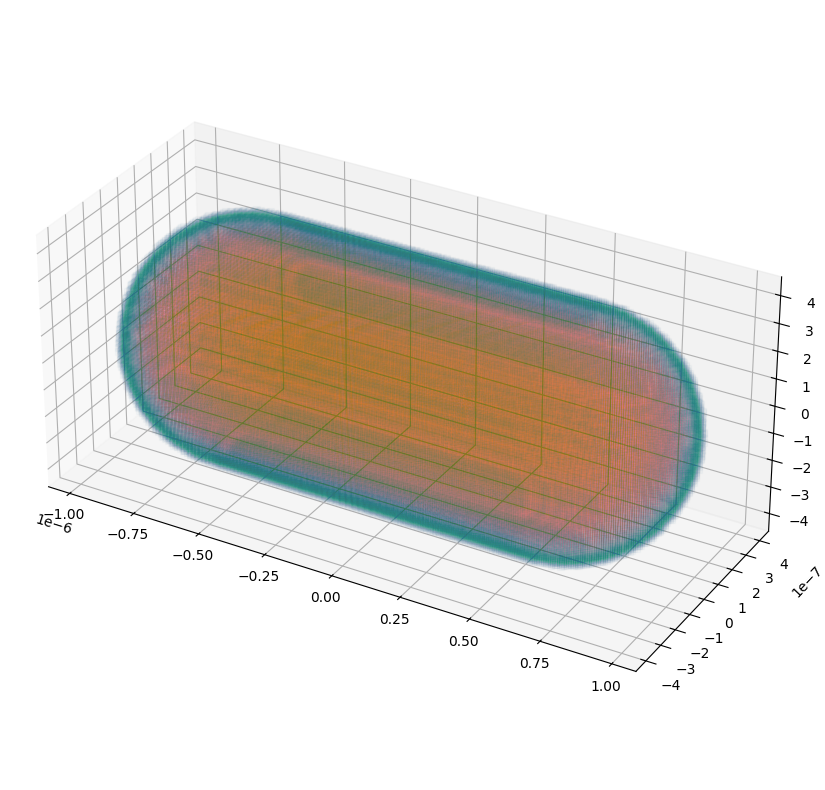

In [2]:
d = DesignTool()
d.get_blanket_space([131, 57, 57], spacing=16e-9, wall=False)
d.add_ecoli_rod(l=2e-6, r=0.4e-6, barrier_type=1, space_type=1, offsety=0, thickness=2, method='const')#, offsety=1.6e-7)
d.special_space_type[d.barrier_type==1] = 2
# d.set_border_wall()
%matplotlib inline
d.draw3D(exclude_barrier_type=[0], exclude_space_type=[0])


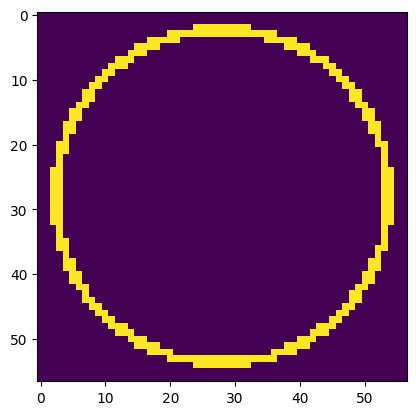

In [3]:
plt.imshow(d.barrier_type[65])

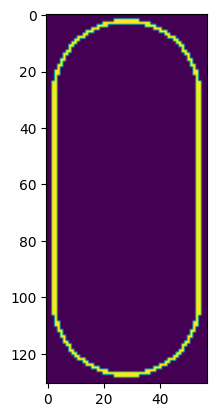

In [4]:
plt.imshow(d.barrier_type[:, 30])

In [5]:
mol_Iex = Molecule('Iex', diffusion_coefficient=1.28e-12, observed_barrier_types=None)
# mol_Iin = Molecule('Iin', diffusion_coefficient=1.28e-12, observed_barrier_types=None)
# mol_Y = Molecule('Y', diffusion_coefficient=0, observed_barrier_types=1)
# mol_YI = Molecule('YI', diffusion_coefficient=0, observed_barrier_types=None)
# mol_B = Molecule('B', diffusion_coefficient=8.15e-14, observed_barrier_types=[1, 2])
# mol_C = Molecule('C', diffusion_coefficient=8.15e-14, observed_barrier_types=[1, 2])
# molset = MoleculeSet([mol_A, mol_B, mol_C])
# molset = MoleculeSet([mol_Iex, mol_Iin, mol_Y, mol_YI])
molset = MoleculeSet([mol_Iex])

In [6]:
rxset = ReactionSet()
rxset.add_reaction(['Iex'], ['Iin'], 2.33e-3)
rxset.add_reaction(['Iin'], ['Iex'], 2.33e-3)
rxset.add_reaction(['Y', 'Iex'], ['YI'], 3.03e+4, location=d.special_space_type==2)
rxset.add_reaction(['YI'], ['Y', 'Iex'], 1.2e-1)
rxset.add_reaction(['YI'], ['Y', 'Iin'], 1.2e+1)
# rxset.add_reaction(['A', 'B'], ['C'], 1.07e5)
# rxset.add_reaction(['C'], ['A', 'B'], 0.351)

In [7]:
a = RediCell_CuPy(design=d, molecule_types=molset, reaction_set=None, t_step=2e-3)

In [8]:
a.true_sides

array([131,  57,  57])

In [9]:
a_supply_matrix = cp.zeros(a.true_sides)
# a_supply_matrix[(a.special_space_type == 0) * (a.barrier_type == -1)] = 1
# a_supply_matrix[1:-1, 1:-1, [1, -2]] = 1
# a_supply_matrix[1:-1, [1, -2], 1:-1] = 1
# a_supply_matrix[[1, -2], 1:-1, 1:-1] = 1
a_supply_matrix[:, :, [0, -1]] = 1
a_supply_matrix[:, [0, -1], :] = 1
a_supply_matrix[:, :, [0, -1]] = 1

a.add_external_conditions(a_supply_matrix, mol_Iex, 5)
a.show_external_conditions()

Maintain 5 micromolar of Iex within a space of 29344 voxels (362 molecules)


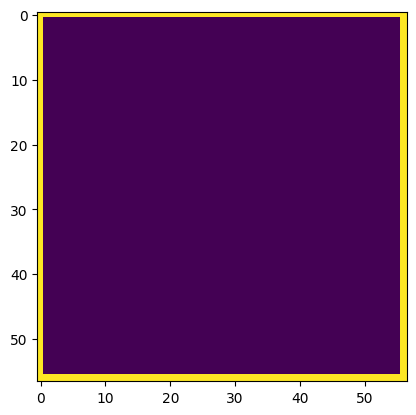

In [10]:
plt.imshow(a_supply_matrix[80].get())

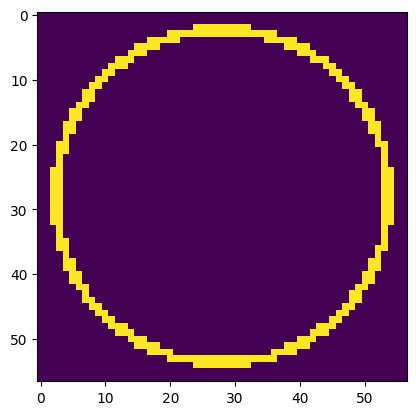

In [11]:
plt.imshow(a.barrier_type[80].get())

In [12]:
a.partition()

Action list:
Diffusion of Iex (6 directions)
No reactions


In [13]:
a.configure_barrier()

In [14]:
a.maintain_external_conditions()

In [15]:
a.mesh[0].shape

(131, 57, 57)

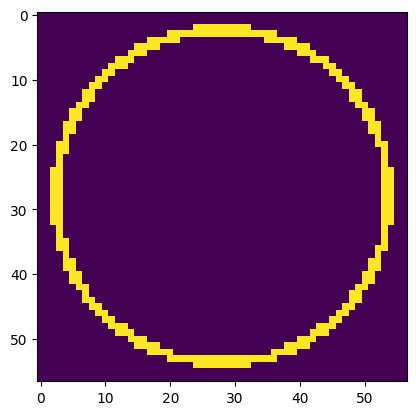

In [16]:
plt.imshow(a.barrier_type[80].get())

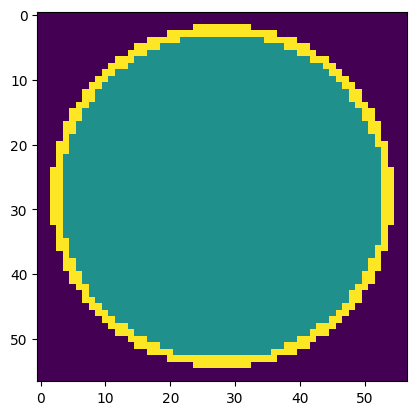

In [17]:
plt.imshow(d.special_space_type[80])

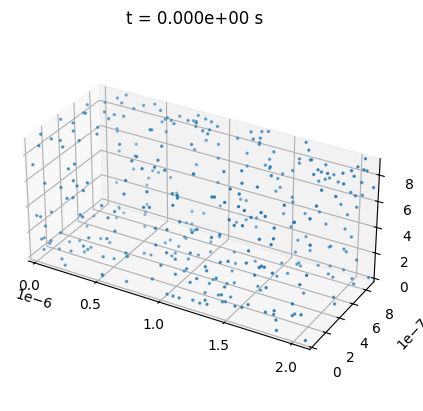

In [18]:
a.plot3D(['Iex'], wall=False)

In [19]:
a.not_barrier_matrix_up.shape

(1, 130, 57, 57)

In [20]:
a.voxel_matrix[0].sum()

array(359., dtype=float16)

In [21]:
a.diffusion_vector

[29999.999999999996]

In [22]:
a.determine_maximum_timestep()

Max time step is 5.00e-05 s (max 1.0 particles in voxel)


array(5.e-05, dtype=float16)

In [29]:
a.simulate(10000, t_step=5e-5, plot_every=None, timing=False, checkpoint_every=None, traj_every=None, maintain_every=100, log_every=1)
# a.plot(['Iex', 'Iin'], wall=False)

  1%|          | 67/10000 [00:00<00:14, 666.05it/s]

Simulate 10000 steps


100%|██████████| 10000/10000 [00:14<00:00, 667.11it/s]


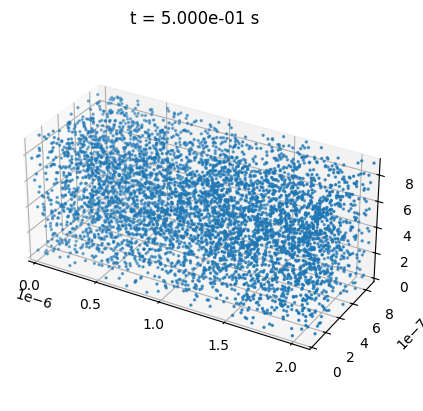

In [24]:
a.plot(['Iex'], wall=False)

In [25]:
a.conc_trace

[array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([362.], dtype=float32),
 array([

In [26]:
a.voxel_matrix[0].astype(cp.float32).get().sum()

5206.0

In [27]:
np.prod(np.array(a.voxel_matrix[0].shape)) / a.one_per_voxel_equal_um

1050.0109258752002

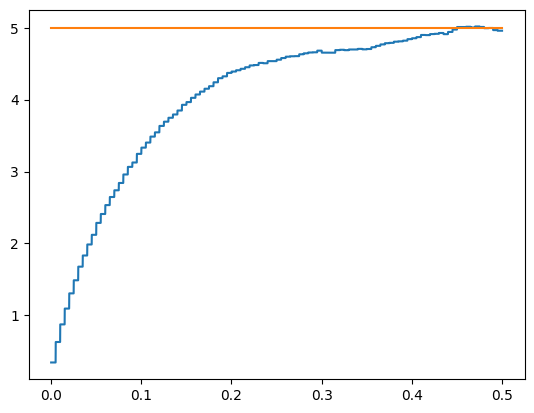

In [28]:
plt.plot(a.t_trace, np.array([x.astype(cp.float32).get() for x in a.conc_trace]) * a.one_per_voxel_equal_um / np.prod(np.array(a.voxel_matrix[0].shape)))
plt.plot([a.t_trace[0], a.t_trace[-1]], [5, 5])
# plt.yticks(range(7))
# plt.yscale('log')

In [30]:
a.one_per_voxel_equal_um

405.3472106923459

In [32]:
a.one_per_voxel_equal_um * float(a.voxel_matrix[a.mol_to_id['Iex']].sum()) / np.prod(np.array(a.voxel_matrix[0].shape))

5.043757040514318

In [33]:
np.prod(np.array(a.voxel_matrix[0].shape))

425619